# Regression Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [22]:
df = pd.read_csv('Data/Hitters.csv').dropna()
#df.columns

In [23]:
df = pd.read_csv('Data/Hitters.csv', index_col=0).dropna()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df.Salary
#X= df.drop(['Salary','League', 'Division', 'NewLeague'], axis=1).astype('float64')
#X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X=df[['Years', 'Hits']]

In [27]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

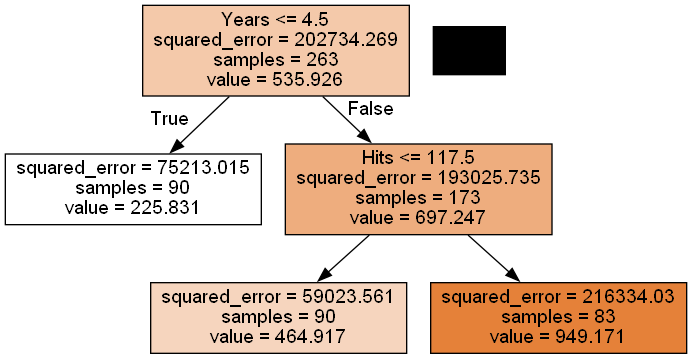

In [28]:
graph, = print_tree(regr, features=['Years', 'Hits'])
Image(graph.create_png())

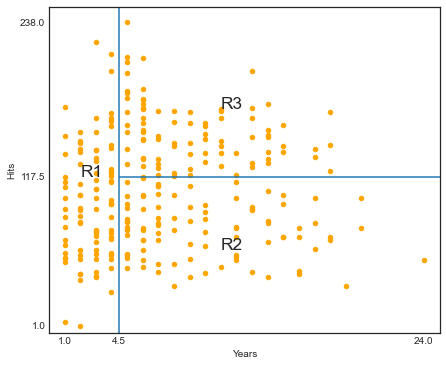

In [29]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

In [15]:
regr.score(X,y)

0.43665573627391885

In [16]:
boston_df = pd.read_csv('Data/Boston.csv')
#boston_df.info()

In [17]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [18]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

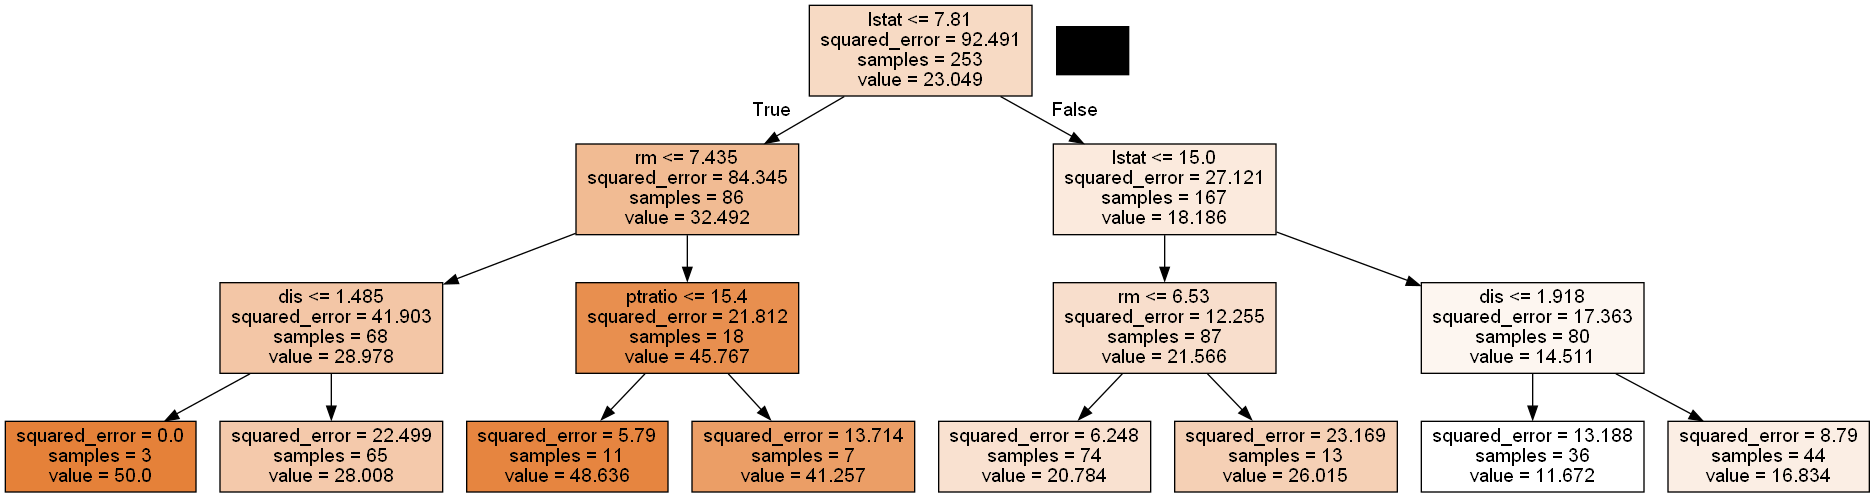

In [19]:
graph, = print_tree(regr2, features=X.columns)
Image(graph.create_png())

In [20]:
regr2.score(X_train,y_train)

0.8612338526838175

In [21]:
regr2.score(X_test,y_test)

0.6567545227706459